1. 데이터셋의 차원을 축소하는 주요 목적은 무엇인가요? 대표적인 단점은 무엇인가요?

In [1]:
# 목적: 
# 1. 훈련 알고리즘의 속도를 높이기 위해
# 2. 데이터를 시각화하고 가장 중요한 특성에 대한 인사이트를 얻기 위해
# 3. 메모리 공간을 절약하기 위해(압축)
# 단점:
# 1. 일부 정보를 잃어버려 훈련 알고리즘의 성능을 감소시킬 수 있음.
# 2. 계산 비용이 높음.
# 3. 머신러닝 파이프라인의 복잡도를 증가시킴
# 4. 변환된 데이터를 이해하기 어려운 경우가 많음.

2. 차원의 저주란 무엇인가요?

In [3]:
# 저차원 공간에는 없는 많은 문제가 고차원 공간에서 일어난다는 사실

3. 데이터셋의 차원을 축소하시키고 나서 이 작업을 원상 복구할 수 있나요? 할수 있다면 어떻게 가능할까요? 가능하지 않다면 왜일까요?

In [2]:
# 완벽하게 되돌리는 것은 불가능. 
# 일부 알고리즘인 경우에만(pca) 비슷한 데이터셋을 재구성 할 수 있음.

4. 매우 비선형적인 데이터셋의 차원을 축소하는 데 PCA를 사용할 수 있을까요?

In [4]:
# PCA는 불필요한 차원을 제거할 수 있기 때문에 
# 매우 비선형적이더라도 대부분의 데이터셋에서 차원을 축소하는 데 사용가능.
# 하지만 너무 많은 정보를 잃을 수 있음.

5. 설명된 분산을 95%로 지정한 PCA를 1000개의 차원을 가진 데이터셋에 적용한다고 가정하겠습니다. 결과 데이터셋의 차원은 얼마나 될까요?

In [5]:
# 데이터셋에 따라 달라짐. 1에서 950개 사이의 어떤 수도 될 수 있음.
# 차원 수에 대한 함수로 설명된 분산의 그래프를 그려보아 예측가능

6. 기본 PCA, 점진적 PCA, 랜덤 PCA, 랜덤 투영은 각각 어느 경우에 사용될까요?

In [8]:
# 기본 PCA: 우선적으로 사용. 하지만 데이터셋 크기가 메모리에 맞을 때 가능
# 점진적 PCA: 메모리에 담을 수 없는 대용량 데이터셋에 적합.
#           : 새로운 샘플이 발생될 때마다 실시간으로 PCA를 적용해야하는 온라인 작업에 사용 가능.
# 랜덤 PCA: 데이터셋이 메모리 크기에 맞고 차원을 크게 축소시킬 때 사용.
# 랜덤 투영: 매우 고차원인 데이터셋에 적합.

7. 어떤 데이터셋에 적용한 차원 축소 알고리즘의 성능을 어떻게 평가할 수 있을까요?

In [9]:
# 직관적으로 데이터셋에서 너무 많은 정보를 잃지 않으면서 차원을 많이 제거.
# 한가지 방법: 역변환을 수행해서 재구성 오차를 측정해봄.
# 하지만 모든 차원축소 알고리즘이 역변환을 제공하지 않음.
# 암튼 너무 많은 정보가 소실되지 않으면서 원본 데이터셋을 사용했을 때와 비슷한 성능이 나와야함.

8. 두 개의 차원 축소 알고리즘을 연결할 수 있을까요?

In [10]:
# 가능.
# ex) PCA나 랜덤투영으로 불필요한 차원을 제거하고 LLE 같이 훨씬 느린 알고리즘을 적용.

9. (3장에서 소개한) MNIST 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할합니다(처음 60,000개는 훈련을 위한 샘플이고 나머지 10,000개는 테스트용입니다). 이 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 만들어진 모델을 평가합니다. 그런 다음 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소합니다. 이 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 확인합니다. 훈련 속도가 더 빨라졌나요? 이제 테스트 세트에서 이 분류기를 평가해보세요. 이전 분류기와 비교해서 어떤가요? SGDClassifier로 다시 시도해 보세요. PCA가 얼마나 도움이 되나요?

In [11]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [14]:
# 랜덤 포레스트 분류기를 훈련
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

%time rnd_clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

CPU times: total: 40.9 s
Wall time: 1min 23s


0.9705

In [15]:
# PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [16]:
# 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 확인
rnd_clf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)
%time rnd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: total: 2min 56s
Wall time: 5min 49s


RandomForestClassifier(random_state=42)

In [17]:
# 훈련이 실제로 두 배 정도 느려짐.
# 차원 축소가 항상 훈련 시간 단축으로 이어지는 것은 아니며 
# 데이터셋, 모델 및 훈련 알고리즘에 따라 달라짐.

In [18]:
# 분류기 평가
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481

In [19]:
# SGDClassifier로 다시 시도

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)
# 속도 빨라짐

CPU times: total: 1min 22s
Wall time: 2min 51s


SGDClassifier(random_state=42)

In [21]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.874

In [22]:
# 축소된 데이터 세트를 사용하여 훈련
sgd_clf_with_pca = SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: total: 13.8 s
Wall time: 30.9 s


SGDClassifier(random_state=42)

In [23]:
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8959

10. t-SNE 알고리즘을 사용해 MNIST 데이터셋의 처음 5,000개 이미지를 2차원으로 축소시키고 맷플롯립으로 그래프를 그려보세요. 이미지의 타깃 클래스마다 10가지 색상으로 나타낸 산점도를 그릴 수 있습니다.

In [24]:
# 작업 속도를 높이기 위해 MNIST 훈련 세트의 첫 5,000개 이미지로 제한
X_sample, y_sample = X_train[:5000], y_train[:5000]

In [ ]:
# 데이터 집합을 그래프로 그릴 수 있도록 t-SNE를 사용하여 차원을 2D로 줄이기
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
%time X_reduced = tsne.fit_transform(X_sample)
# 패키지 손상가서 오류나요...

In [ ]:
# 산점도

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # 입력 특성의 스케일을 0에서 1까지로 조정해 보겠습니다.
    X_normalized = MinMaxScaler().fit_transform(X)
    # 이제 지금까지 그린 숫자의 좌표 목록을 만듭니다.
    # 아래 루프에서 `if` 문을 피하기 위해 시작할 때 이미 멀리 떨어져 있는 것으로 가정합니다.
    neighbors = np.array([[10., 10.]])
    # 나머지는 설명이 필요 없습니다.
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # 현재 축 가져오기
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

CPU times: total: 344 ms
Wall time: 304 ms


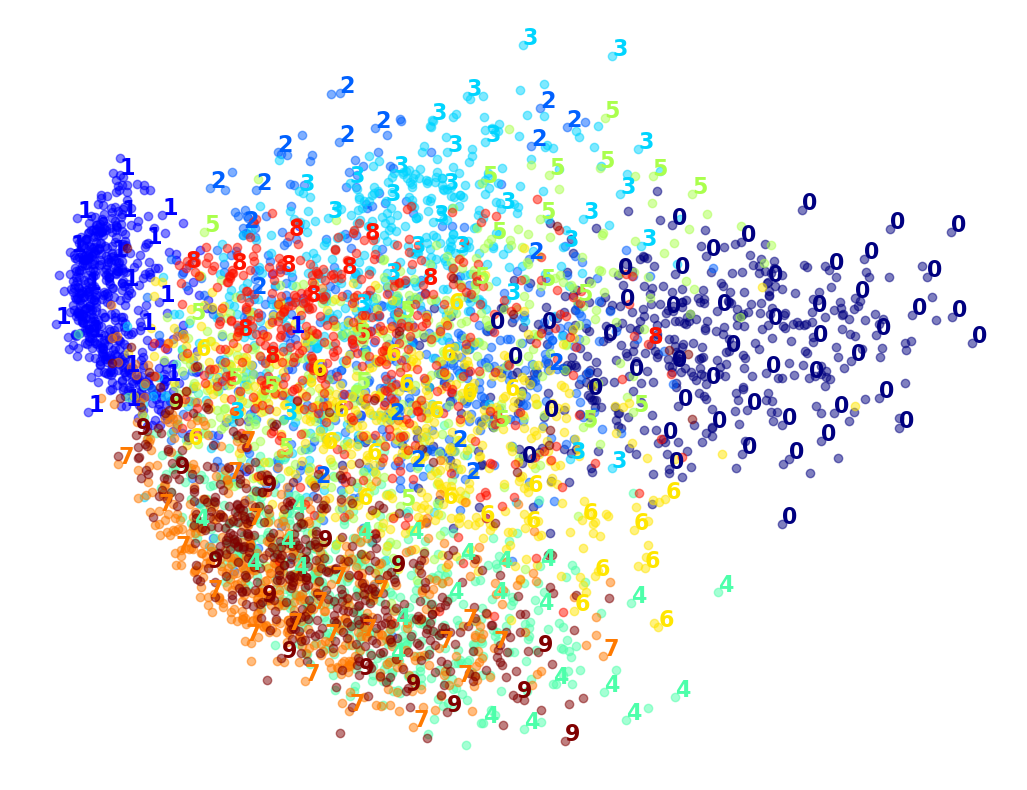

In [45]:
# PCA, LLE, MDS 같은 차원 축소 알고리즘을 적용해보고 시각화 결과를 비교해보세요.
# PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
%time X_pca_reduced = pca.fit_transform(X_sample)
plot_digits(X_pca_reduced, y_sample)
plt.show()

In [ ]:
# LLE
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)
plt.show()
# 패키지 오류  OpenBLAS

In [ ]:
# MDS
# 사이킷런 1.4버전에서 normalized_stress 매개변수의 기본값이 False에서 "auto"로 변경됩니다.
# 동일한 결과를 유지하도록 명시적으로 False로 지정합니다.
from sklearn.manifold import MDS
X_mds_reduced = MDS(n_components=2, normalized_stress=False,
                    random_state=42).fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)
plt.show()